<a href="https://colab.research.google.com/github/DanielT118/Gallstones-Research-Project/blob/main/Gallstones_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt


In [4]:
url = "https://raw.githubusercontent.com/DanielT118/Gallstones-Research-Project/refs/heads/main/dataset-uci%5B1%5D.csv"
df = pd.read_csv(url)
df.head()


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [ ]:
#Checking for duplicate rows
duplicates = df.duplicated()
print(duplicates)
num_duplicates = duplicates.value_counts(False)
print(num_duplicates)
#This indicates that there are no duplicate rows.

0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Length: 319, dtype: bool
False    319
Name: count, dtype: int64


In [22]:
features = df.drop('Gallstone Status', axis = 1)
label = df['Gallstone Status']

from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k = 3)
selector.fit_transform(features, label)

best_features = df[selector.get_feature_names_out()]
best_features

,Lean Mass (LM) (%),C-Reactive Protein (CRP),Vitamin D
0,80.84,0.0,33.0
1,67.20,0.0,25.0
2,72.67,0.0,30.2
3,84.19,0.0,35.4
4,80.02,0.0,40.6
...,...,...,...
314,75.23,6.2,8.3
315,76.40,0.0,24.0
316,71.22,0.0,15.7
317,78.85,0.4,33.3


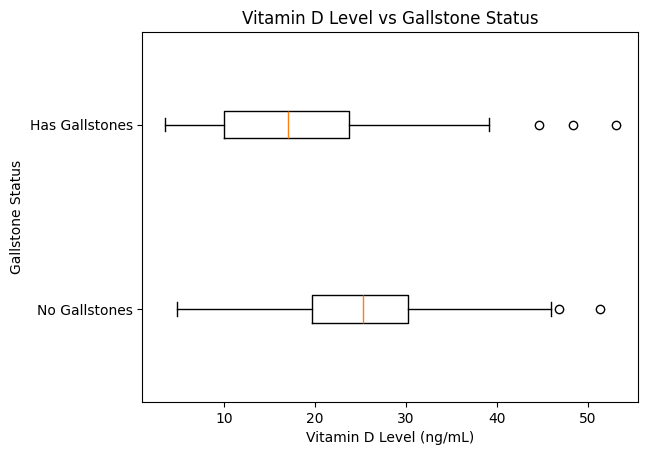

In [30]:
no_gallstones = df[df['Gallstone Status'] == 0]
gallstones_present = df[df['Gallstone Status'] == 1]
vitamin_d_graph = no_gallstones['Vitamin D'], gallstones_present['Vitamin D']
plt.boxplot(vitamin_d_graph, vert = False)
plt.yticks([1, 2], ['No Gallstones', 'Has Gallstones'])
plt.xlabel('Vitamin D Level (ng/mL)')
plt.ylabel('Gallstone Status')
plt.title('Vitamin D Level vs Gallstone Status')
plt.show()

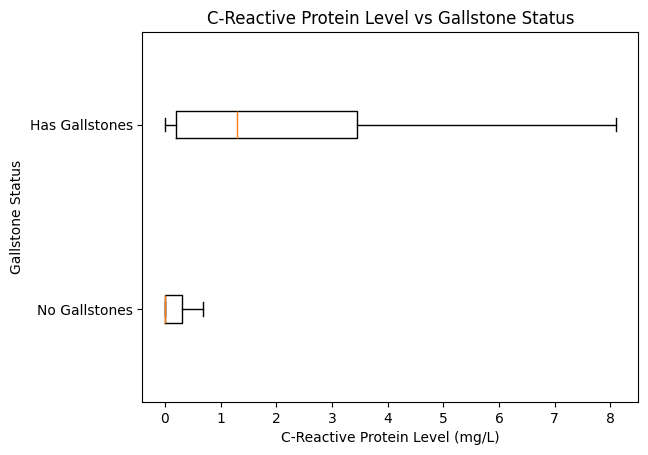

In [31]:
no_gallstones = df[df['Gallstone Status'] == 0]
gallstones_present = df[df['Gallstone Status'] == 1]
crp_graph = no_gallstones['C-Reactive Protein (CRP)'], gallstones_present['C-Reactive Protein (CRP)']
plt.boxplot(crp_graph, vert = False, showfliers = False)
plt.yticks([1, 2], ['No Gallstones', 'Has Gallstones'])
plt.xlabel('C-Reactive Protein Level (mg/L)')
plt.ylabel('Gallstone Status')
plt.title('C-Reactive Protein Level vs Gallstone Status')
plt.show()

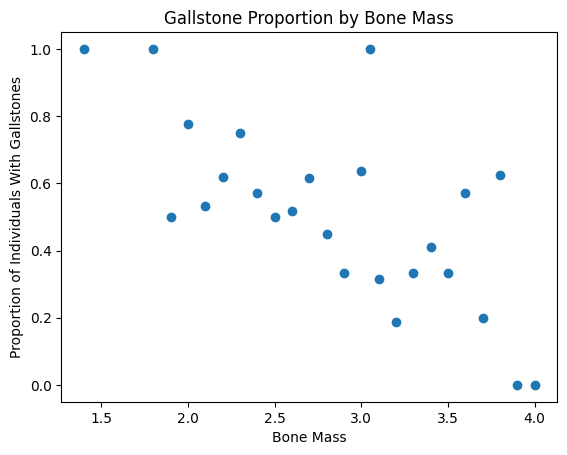

In [32]:
grouped_data = df.groupby('Bone Mass (BM)')
gallstone_frac = grouped_data['Gallstone Status'].mean()

x_values = gallstone_frac.index
plt.scatter(x_values, gallstone_frac)

plt.xlabel('Bone Mass')
plt.ylabel('Proportion of Individuals With Gallstones')
plt.title('Gallstone Proportion by Bone Mass')

plt.show()